In [ ]:
# 03. Machine Learning Methods

Базовые методы машинного обучения для атрибуции авторства на подготовленных ранее текстах и TF-IDF представлениях.

- Naive Bayes
- Logistic Regression

In [ ]:
## Naive Bayes

Обучение модели Multinomial Naive Bayes на каждой TF-IDF матрице.
Для каждого dubia-текста сохраняются:
- предсказанный автор
- вероятности для всех авторов

In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [21]:
train_path = "/Users/anastasiabogdanova/R_directory/iskra-project/ml-mini-project/data/train_chunks.csv"

df_train = pd.read_csv(train_path)

df_train = df_train[['text', 'author']]
df_train.head()


,text,author
0,LES BEAUX ESPRITS SE RENCONTRENT Знаменитая аг...,lenin
1,"с другой стороны, надо признаться, что Давид, ...",lenin
2,Падение Порт-Артура “Порт-Артур капитулировал....,lenin
3,Несовместимость самодержавия с интересами всег...,lenin
4,"революционно лишь до тридцати, примерно, лет, ...",lenin


In [5]:
X_texts = df_train['text']
y_authors = df_train['author']

le = LabelEncoder()
y = le.fit_transform(y_authors)


In [7]:
import re

# кастомные стоп-слова: неприменимо, удалила 31.12.2025
custom_stopwords = []

def clean_tokenizer(text):
    # находим все токены (слова)
    tokens = re.findall(r'\b\w+\b', text.lower())
    
    # фильтруем токены
    tokens = [
        t for t in tokens
        if re.search('[а-яё]', t)      # хотя бы одна русская буква
        and t not in custom_stopwords  # исключаем кастомные стоп-слова
        and not t.isdigit()            # исключаем любые числа
    ]
    
    return tokens

In [9]:
vectorizer = TfidfVectorizer(
    tokenizer=clean_tokenizer,
    lowercase=True,
    max_features=1000
)

X = vectorizer.fit_transform(X_texts)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [11]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=818)
model = MultinomialNB()

y_pred = cross_val_predict(model, X, y, cv=cv)


In [13]:
print("Naive Bayes — classification report:")
print(classification_report(y, y_pred, target_names=le.classes_))


Naive Bayes — classification report:
              precision    recall  f1-score   support

       lenin       0.85      0.95      0.89       229
      martov       0.00      0.00      0.00        14
      parvus       0.00      0.00      0.00        40
    plehanov       0.00      0.00      0.00        36
     trotsky       0.76      0.95      0.84       255

    accuracy                           0.80       574
   macro avg       0.32      0.38      0.35       574
weighted avg       0.68      0.80      0.73       574



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


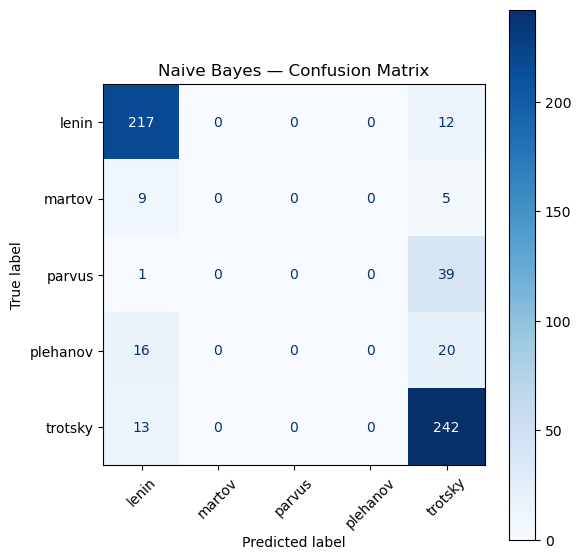

Confusion matrix сохранена в:
/Users/anastasiabogdanova/R_directory/iskra-project/ml-mini-project/results/nb_confusion_matrix.png


In [19]:
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# --- путь для сохранения ---
results_dir = "/Users/anastasiabogdanova/R_directory/iskra-project/ml-mini-project/results"
os.makedirs(results_dir, exist_ok=True)
save_path = os.path.join(results_dir, "nb_confusion_matrix.png")

# --- confusion matrix ---
cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

# --- создаём фигуру ---
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap="Blues", xticks_rotation=45, ax=ax)
ax.set_title("Naive Bayes — Confusion Matrix")

plt.tight_layout()
plt.savefig(save_path, dpi=300)  # сохраняем
plt.show()  # показываем в ноутбуке

print(f"Confusion matrix сохранена в:\n{save_path}")


In [ ]:
# Первые выводы по NB

Multinomial Naive Bayes распознает только тех авторов, которые представлены большими объёмами текста, 
не работает на слабо представленных авторах. 
Naive Bayes — частотная модель не «компенсирует» дисбаланс, не умеет «сомневаться», выбирает самого вероятного по статистике

In [ ]:
## Logistic Regression

Обучение модели Logistic Regression на каждой TF-IDF матрице.


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


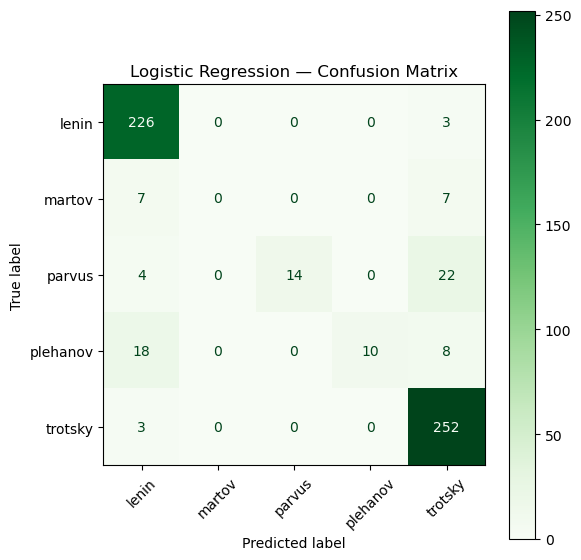

Confusion matrix Logistic Regression сохранена в:
/Users/anastasiabogdanova/R_directory/iskra-project/ml-mini-project/results/lr_confusion_matrix.png


In [23]:
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# --- создаём и обучаем модель ---
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, multi_class='multinomial')
lr.fit(X, y)

# --- предсказания на train для оценки ---
y_pred_lr = lr.predict(X)

# --- confusion matrix ---
cm_lr = confusion_matrix(y, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=le.classes_)

# --- путь для сохранения ---
results_dir = "/Users/anastasiabogdanova/R_directory/iskra-project/ml-mini-project/results"
os.makedirs(results_dir, exist_ok=True)
save_path_lr = os.path.join(results_dir, "lr_confusion_matrix.png")

# --- визуализация ---
fig, ax = plt.subplots(figsize=(6, 6))
disp_lr.plot(cmap="Greens", xticks_rotation=45, ax=ax)
ax.set_title("Logistic Regression — Confusion Matrix")

plt.tight_layout()
plt.savefig(save_path_lr, dpi=300)  # сохраняем
plt.show()  # отображаем в ноутбуке

print(f"Confusion matrix Logistic Regression сохранена в:\n{save_path_lr}")


In [25]:
from sklearn.metrics import classification_report

# --- предсказания на train ---
y_pred_lr = lr.predict(X)

# --- classification report ---
report_lr = classification_report(y, y_pred_lr, target_names=le.classes_)
print("Logistic Regression — classification report:\n")
print(report_lr)


Logistic Regression — classification report:

              precision    recall  f1-score   support

       lenin       0.88      0.99      0.93       229
      martov       0.00      0.00      0.00        14
      parvus       1.00      0.35      0.52        40
    plehanov       1.00      0.28      0.43        36
     trotsky       0.86      0.99      0.92       255

    accuracy                           0.87       574
   macro avg       0.75      0.52      0.56       574
weighted avg       0.87      0.87      0.84       574



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Комментарии по Logistic Regression

Общая accuracy: 0.87, у Naive Bayes (0.80).

В целом Logistic Regression лучше справляется с заметно представленными классами (lenin, trotsky), чем Naive Bayes.
Малые классы всё еще плохо распознаются.

Вывод: на малых объемах текста надежной классификации добиться сложно.

In [ ]:
# Предсказываем авторство для dubia-текстов

In [31]:
import pandas as pd

# --- Путь к файлу с предобработанными dubia ---
dubia_path = "/Users/anastasiabogdanova/R_directory/iskra-project/ml-mini-project/data/dubia_clean.csv"

# --- Загрузка DataFrame ---
df_dubia = pd.read_csv(dubia_path)

# Если есть колонка с токенами/очищенным текстом, например 'clean_text', 
# убедись, что она присутствует
df_dubia.head()


,author,filename,text,n_words
0,dubia,dubia_poslednee_slovo_bund_I.txt,последнее слово бундовского национализма загра...,1032
1,dubia,dubia_priznaki_bankrotstva_I.txt,признаки банкротства всего только год прошел с...,2203
2,dubia,dubia_novoe_poboishe_I.txt,новое побоище повидимому мы переживаем момент ...,2011
3,dubia,dubia_ot_red_iskry_I.txt,заявление редакции искры от редакции предприни...,2461
4,dubia,dubia_slovo_mosc_vedomostyam_I.txt,похвальное слово московским ведомостям жаль чт...,440


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# --- 1. Подготовка TF-IDF ---
tfidf_vectorizer = TfidfVectorizer(
    tokenizer=clean_tokenizer,
    lowercase=True,
    max_features=1000
)

X_train = tfidf_vectorizer.fit_transform(df_train['text'])
y_train = df_train['author']

# --- 2. Кодируем метки авторов для LR ---
le = LabelEncoder()
y_encoded = le.fit_transform(y_train)

# --- 3. Обучаем Naive Bayes ---
nb = MultinomialNB()
nb.fit(X_train, y_train)

# --- 4. Обучаем Logistic Regression ---
lr = LogisticRegression(max_iter=1000, multi_class='multinomial')
lr.fit(X_train, y_encoded)

# --- 5. Преобразуем dubia-тексты ---
X_dubia = tfidf_vectorizer.transform(df_dubia['text'])

# --- 6. Предсказания NB ---
df_dubia['predicted_author_nb'] = nb.predict(X_dubia)

# --- 7. Предсказания LR ---
probs = lr.predict_proba(X_dubia)
df_dubia['predicted_author_lr'] = le.inverse_transform(probs.argmax(axis=1))

# --- 8. Опционально: добавить вероятности (уверенность) ---
df_probs_lr = pd.DataFrame(probs, columns=le.classes_)
df_probs_lr['filename'] = df_dubia['filename']

# --- 9. Просмотр результатов ---
df_dubia[['filename', 'predicted_author_nb', 'predicted_author_lr']].head(10)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,filename,predicted_author_nb,predicted_author_lr
0,dubia_poslednee_slovo_bund_I.txt,lenin,lenin
1,dubia_priznaki_bankrotstva_I.txt,trotsky,trotsky
2,dubia_novoe_poboishe_I.txt,lenin,lenin
3,dubia_ot_red_iskry_I.txt,lenin,lenin
4,dubia_slovo_mosc_vedomostyam_I.txt,lenin,lenin
5,dubia_nasushnie_zadachi_I.txt,lenin,lenin
6,dubia_zakon_o_voznagr_I.txt,lenin,lenin


In [49]:
import numpy as np

# --- 1. Для Logistic Regression ---
# margin = разница между первой и второй максимальной вероятностью
lr_margin = np.sort(probs, axis=1)[:, -1] - np.sort(probs, axis=1)[:, -2]
df_dubia['lr_margin'] = lr_margin
df_dubia['lr_confidence'] = np.where(df_dubia['lr_margin'] > 0.05, 'high', 'low')

# --- 2. Для Naive Bayes ---
# NB не даёт вероятности всех классов напрямую через predict, но через predict_proba можно
nb_probs = nb.predict_proba(X_dubia)
nb_margin = np.sort(nb_probs, axis=1)[:, -1] - np.sort(nb_probs, axis=1)[:, -2]
df_dubia['nb_margin'] = nb_margin
df_dubia['nb_confidence'] = np.where(df_dubia['nb_margin'] > 0.05, 'high', 'low')


# --- 3. Сохраняем результаты в CSV ---
ml_output_path = "/Users/anastasiabogdanova/R_directory/iskra-project/ml-mini-project/results/df_dubia_predictions.csv"
df_dubia[['filename', 'predicted_author_nb', 'nb_margin', 'nb_confidence',
          'predicted_author_lr', 'lr_margin', 'lr_confidence']].to_csv(ml_output_path, index=False)

print(f"Предсказания ML сохранены: {ml_output_path}")



Предсказания ML сохранены: /Users/anastasiabogdanova/R_directory/iskra-project/ml-mini-project/results/df_dubia_predictions.csv


In [53]:
# --- 3. Итоговая таблица ---
# df_dubia[['filename', 'predicted_author_nb', 'nb_margin', 'nb_confidence',
          'predicted_author_lr', 'lr_margin', 'lr_confidence']]

df_dubia

IndentationError: unexpected indent (763990754.py, line 3)

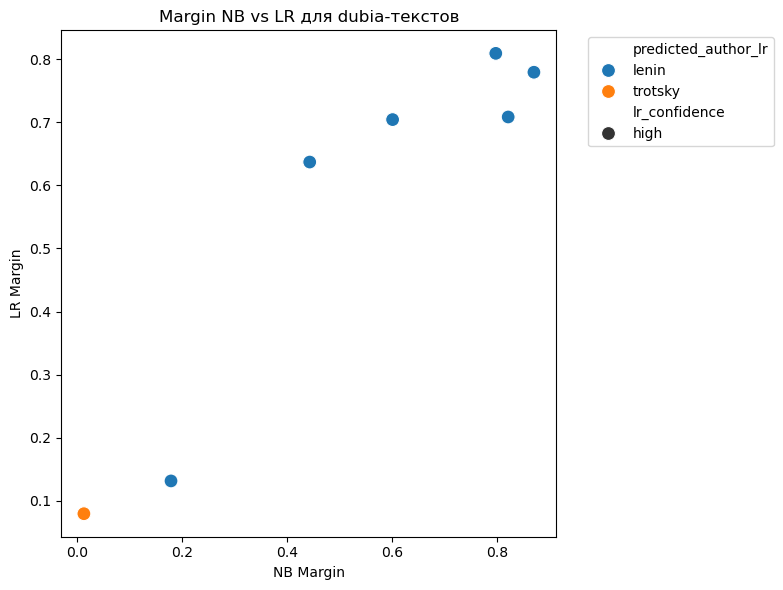

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_dubia,
    x='nb_margin',
    y='lr_margin',
    hue='predicted_author_lr',  # или nb, если хочешь
    style='lr_confidence',      # high/low
    s=100,
    palette='tab10'
)
plt.title("Margin NB vs LR для dubia-текстов")
plt.xlabel("NB Margin")
plt.ylabel("LR Margin")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Сохраняем график
plt.savefig("/Users/anastasiabogdanova/R_directory/iskra-project/ml-mini-project/results/dubia_margin_plot.png")
plt.show()


In [ ]:
# Единый датафрейм, который объединяет:

предсказания NB и LR + Косинусную и Танимото метрики (stable, margin, author_label, confidence)

In [55]:
import pandas as pd

# --- 1. Загружаем результаты distance-based методов ---
combined_path = "/Users/anastasiabogdanova/R_directory/iskra-project/ml-mini-project/results/df_combined.csv"
df_combined = pd.read_csv(combined_path)

# --- 2. Загружаем результаты ML (Naive Bayes и Logistic Regression) ---
ml_path = "/Users/anastasiabogdanova/R_directory/iskra-project/ml-mini-project/results/df_dubia_predictions.csv"
df_dubia_predictions = pd.read_csv(ml_path)

# --- 3. Объединяем все результаты в одну таблицу ---
df_final = df_combined.copy()

# Добавляем колонки с предсказаниями моделей
df_final['predicted_author_nb'] = df_dubia_predictions['predicted_author_nb']
df_final['predicted_author_lr'] = df_dubia_predictions['predicted_author_lr']
df_final['nb_margin'] = df_dubia_predictions['nb_margin']
df_final['lr_margin'] = df_dubia_predictions['lr_margin']
df_final['nb_confidence'] = df_dubia_predictions['nb_confidence']
df_final['lr_confidence'] = df_dubia_predictions['lr_confidence']

# --- 4. Сохраняем итоговую объединённую таблицу ---
output_path = "/Users/anastasiabogdanova/R_directory/iskra-project/ml-mini-project/results/final_dubia_table.csv"
df_final.to_csv(output_path, index=False)
print(f"Объединённая таблица сохранена: {output_path}")

# Просмотр первых 10 строк
df_final.head(10)



Объединённая таблица сохранена: /Users/anastasiabogdanova/R_directory/iskra-project/ml-mini-project/results/final_dubia_table.csv


,filename,predicted_author_300,predicted_author_500,predicted_author_1000,stable_cosine,cosine_margin_1000,predicted_author_tanimoto_300,predicted_author_tanimoto_500,predicted_author_tanimoto_1000,stable_tanimoto,tanimoto_margin_1000,predicted_author_nb,predicted_author_lr,nb_margin,lr_margin,nb_confidence,lr_confidence
0,dubia_poslednee_slovo_bund_I.txt,lenin,plehanov,lenin,False,0.031601,lenin,lenin,lenin,True,0.065033,lenin,lenin,0.869588,0.779458,high,high
1,dubia_priznaki_bankrotstva_I.txt,martov,lenin,lenin,False,0.029356,martov,lenin,parvus,False,0.000595,trotsky,trotsky,0.013120,0.079480,low,high
2,dubia_novoe_poboishe_I.txt,trotsky,trotsky,lenin,False,0.012380,lenin,lenin,lenin,True,0.010207,lenin,lenin,0.442891,0.637056,high,high
3,dubia_ot_red_iskry_I.txt,lenin,lenin,lenin,True,0.042366,lenin,martov,martov,False,0.000341,lenin,lenin,0.797013,0.809391,high,high
4,dubia_slovo_mosc_vedomostyam_I.txt,lenin,lenin,lenin,True,0.006055,lenin,lenin,lenin,True,0.004165,lenin,lenin,0.178894,0.131436,high,high
5,dubia_nasushnie_zadachi_I.txt,martov,martov,lenin,False,0.006723,martov,martov,lenin,False,0.009259,lenin,lenin,0.820561,0.708505,high,high
6,dubia_zakon_o_voznagr_I.txt,trotsky,trotsky,trotsky,True,0.011401,lenin,lenin,lenin,True,0.026626,lenin,lenin,0.600610,0.704371,high,high


In [ ]:
# Беглые выводы --- Summary

– Distance-based методы (cosine vs Tanimoto)
косинусная метрика чаще нестабильна (False), а Танимото иногда показывает стабильность даже там, где cosine колеблется. 
Это подтверждает, что Танимото «сомневается» и менее категоричен.
– Маржа (margin)
margin не всегда напрямую отражает правильность предсказания — он отражает характеристику метода, а не истинность авторства.
– Машинное обучение (NB и LR)
NB и LR часто дают одинаковые предсказания, особенно для авторов с большим числом текстов в корпусе (Lenin, Trotsky). 
LR более гибкая: даже для менее представленных авторов иногда высокая уверенность (high).

В целом, distance-based методы дают размытые предсказания на маленьком и несбалансированном корпусе, особенно для редких авторов.
ML-модели компенсируют этот эффект и дают более категоричные предсказания, хотя тоже склонны выбирать авторов с большим количеством текстов.

Объединение результатов позволяет видеть, где методы согласуются (high confidence + stable) и где появляются сомнения (False stable, low confidence).